In [7]:
# Importing the required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
import kagglehub


path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


Load the data

In [25]:
with_mask_files = os.listdir('/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1008.jpg', 'with_mask_835.jpg', 'with_mask_1093.jpg', 'with_mask_1725.jpg', 'with_mask_1091.jpg']
['with_mask_2862.jpg', 'with_mask_2135.jpg', 'with_mask_1902.jpg', 'with_mask_37.jpg', 'with_mask_1918.jpg']


In [26]:
without_mask_files = os.listdir('/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1892.jpg', 'without_mask_2904.jpg', 'without_mask_130.jpg', 'without_mask_350.jpg', 'without_mask_1078.jpg']
['without_mask_1862.jpg', 'without_mask_524.jpg', 'without_mask_462.jpg', 'without_mask_3700.jpg', 'without_mask_3484.jpg']


In [27]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [20]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [29]:
# convert images to numpy arrays

with_mask_path = '/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data/with_mask/'
data = []

for img_file in with_mask_files:

  image = Image.open(os.path.join(with_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(os.path.join(without_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [30]:
print(type(data))
print(len(data))

<class 'list'>
7553


array([[[ 58,  58,  58],
        [ 56,  56,  56],
        [ 54,  54,  54],
        ...,
        [ 67,  63,  54],
        [ 66,  60,  52],
        [104,  97,  88]],

       [[ 51,  51,  51],
        [ 49,  49,  49],
        [ 47,  47,  47],
        ...,
        [ 59,  53,  47],
        [ 60,  53,  46],
        [ 68,  60,  51]],

       [[ 46,  46,  46],
        [ 43,  43,  43],
        [ 42,  42,  42],
        ...,
        [ 49,  44,  38],
        [ 51,  44,  36],
        [ 54,  47,  39]],

       ...,

       [[204, 205, 200],
        [197, 198, 193],
        [197, 198, 193],
        ...,
        [223, 219, 208],
        [223, 219, 208],
        [229, 227, 214]],

       [[223, 224, 219],
        [175, 175, 171],
        [224, 225, 220],
        ...,
        [212, 210, 211],
        [222, 221, 223],
        [255, 255, 255]],

       [[242, 242, 238],
        [234, 234, 230],
        [232, 233, 228],
        ...,
        [237, 238, 241],
        [238, 238, 243],
        [253, 253, 255]]], dtype=uint8)
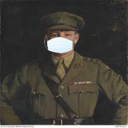

In [31]:
data[0]

In [32]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [33]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Data split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Data Scaling

In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [39]:


# deeplearning packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# metrics to validate
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

Building CNN

In [40]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [41]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [42]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - acc: 0.6568 - loss: 0.7131 - val_acc: 0.8645 - val_loss: 0.3254
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - acc: 0.8766 - loss: 0.3183 - val_acc: 0.8975 - val_loss: 0.2363
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8984 - loss: 0.2617 - val_acc: 0.9091 - val_loss: 0.2128
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9157 - loss: 0.2062 - val_acc: 0.9207 - val_loss: 0.2140
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - acc: 0.9230 - loss: 0.1933 - val_acc: 0.9207 - val_loss: 0.2068


Model evolution

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9272 - loss: 0.1885
Test Accuracy = 0.9272005558013916


In [45]:
# model predictions
Y_pred = model.predict(X_test_scaled)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [46]:
Y_class = np.array([np.argmax(ele) for ele in Y_pred])

In [63]:
# printing the first five outputs
print('The actual label for the first 5 images:', Y_test[0:20])
print('The predicted label for the first 5 images:', Y_class[0:20])

The actual label for the first 5 images: [1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1]
The predicted label for the first 5 images: [1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1]


In [50]:
import random

In [66]:
def validate_rdm_img():
    rdm_img = random.randint(0, len(X_test_scaled))
    plt.imshow(X_test_scaled[rdm_img], cmap='grey')
    plt.show()

    print('Actual Image is:', Y_test[rdm_img])
    print('Predicted Image is:',Y_class[rdm_img])
    print('Prediction Proababiity is:', round(Y_pred[rdm_img][Y_class[rdm_img]]*100, 2), '%')

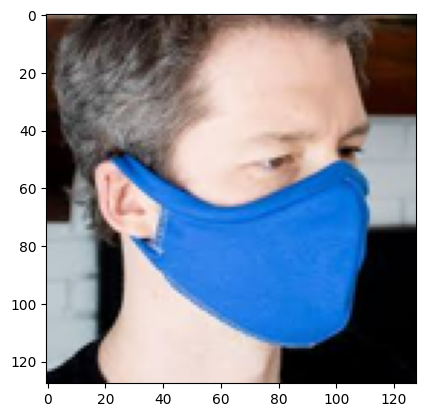

Actual Image is: 1
Predicted Image is: 1
Prediction Proababiity is: 100.0 %


In [71]:
validate_rdm_img()

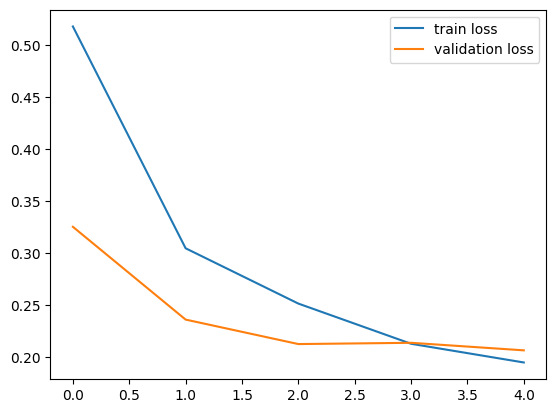

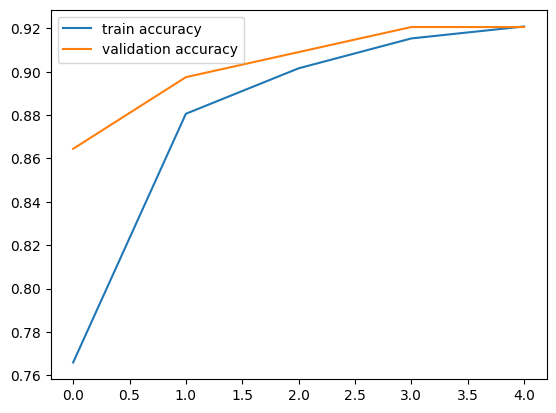

In [70]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

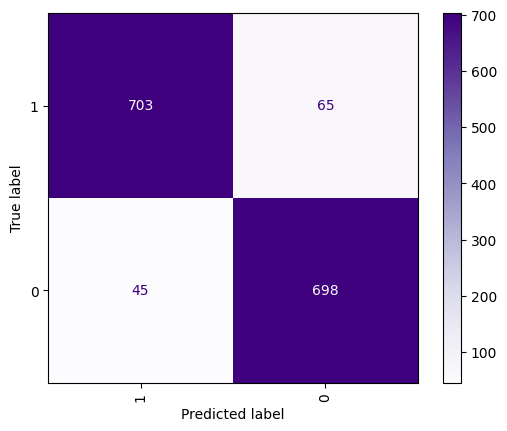

In [72]:
# validation metrics
cm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_class, display_labels=labels, xticks_rotation='vertical', cmap='Purples')